In [2]:
## 모형 불러오기
import trimesh
import numpy as np
model = trimesh.load('./obj/model.stl')
vertices = model.vertices

In [3]:
## 표면 위의 점 추출
### sample_surface_even()은 샘플들이 서로 가까이 붙지않도록 배치
samples = trimesh.sample.sample_surface_even(model, 300)
points = samples[0]

In [73]:
samples, face_indices = trimesh.sample.sample_surface_even(model, 300)


In [78]:
# 각 샘플링된 점에 대해 법선 벡터 추가
for i in range(len(samples)):
    sample = samples[i]           # 표면 위의 샘플링된 점
    face_index = face_indices[i]   # 해당 점이 속한 삼각형 면의 인덱스
    
    # 삼각형 면의 법선 벡터 가져오기
    normal = model.face_normals[face_index]
    
    # 샘플 점과 법선 벡터 결합
    results = np.append(sample, normal)

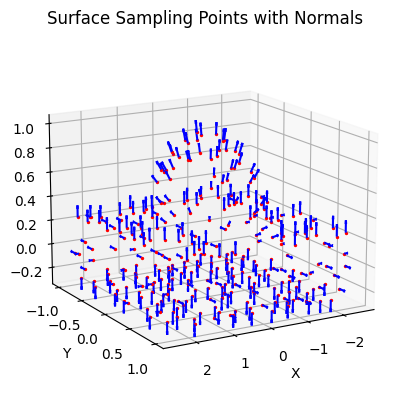

In [85]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 샘플링된 점과 그 점에서의 법선 벡터 시각화
for i in range(len(samples)):
    sample = samples[i]           # 샘플링된 점의 좌표
    face_index = face_indices[i]   # 해당 점이 속한 삼각형 면의 인덱스
    
    # 삼각형 면의 법선 벡터 가져오기
    normal = model.face_normals[face_index]
    
    # 샘플링된 점 그리기
    ax.scatter(sample[0], sample[1], sample[2], color='red', s=2)

    # 법선 벡터 그리기 (샘플링된 점에서 법선 방향으로 선 그리기)
    ax.quiver(sample[0], sample[1], sample[2], 
              normal[0], normal[1], normal[2], 
              length=0.1, color='blue')

# 축과 제목 설정
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Surface Sampling Points with Normals')
ax.view_init(elev=15, azim=60)

plt.show()

In [5]:
# import matplotlib.pyplot as plt
# 
# # 각 정점(vertex)의 법선 벡터 구하기
# vertex_normals = model.vertex_normals
# 
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# 
# # 법선 벡터 시각화
# for i in range(len(vertices)):
#     vertex = vertices[i]
#     vertex_normal = vertex_normals[i]
# 
#     ax.quiver(vertex[0], vertex[1], vertex[2], 
#               vertex_normal[0], vertex_normal[1], vertex_normal[2], 
#               length=0.1, color='b')  # 정점 법선은 파란색으로 표시
# 
# # 축 설정
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# ax.view_init(elev=0, azim=0)
# 
# plt.show()

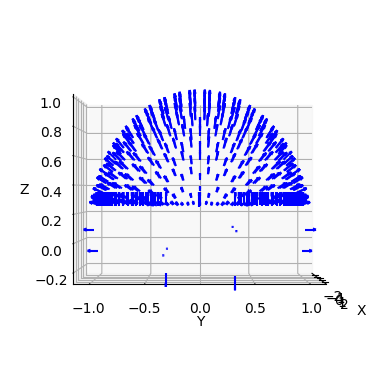

In [57]:
import matplotlib.pyplot as plt

# 각 면의 법선 벡터 구하기
face_centers = model.triangles_center
face_normals = model.face_normals

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 법선 벡터 시각화
for i in range(len(face_centers)):
    center = face_centers[i]
    face_normal = face_normals[i]

    ax.quiver(center[0], center[1], center[2], 
              face_normal[0], face_normal[1], face_normal[2], 
              length=0.1, color='b')  # 정점 법선은 파란색으로 표시

# ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=model.faces, color='white', alpha= 0.3, edgecolor='gray')

# 축 설정
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=0, azim=0)

plt.show()

In [4]:
# points

In [5]:
from scipy.spatial import cKDTree

normal_vectors = []
tangent_vectors = []

tree = cKDTree(points)

for p1 in points:
    # index[0]은 point 자기자신
    # d = p1와 가까운 점들과의 거리, index는 p1과 가까운 점들의 인덱스
    distance_from_p1, index = tree.query(p1, k=3)
    p2 = points[index[1]]
    p3 = points[index[2]]

    # 법선 벡터 계산
    # 벡터 v1 = p2 - p1, v2 = p3 - p1
    v1 = np.subtract(p2, p1)
    v2 = np.subtract(p3, p1)

    # 벡터곱 (크로스 곱)으로 법선 벡터 계산
    normal_vector = np.cross(v1, v2)

    # 정규화 (길이 1로 만들기)
    norm = np.linalg.norm(normal_vector)
    if norm != 0:
        normal_vector = normal_vector / norm

    normal_vectors.append(normal_vector)

    # v1이나 v2를 사용하여 탄젠트 벡터 계산
    # 크로스 곱으로 노멀 벡터와 직교하는 벡터를 탄젠트 벡터로 설정
    tangent_vector = np.cross(normal_vector, v2)

    # 탄젠트 벡터 정규화 (길이 1로 만들기)
    tangent_norm = np.linalg.norm(tangent_vector)
    if tangent_norm != 0:
        tangent_vector = tangent_vector / tangent_norm

    tangent_vectors.append(tangent_vector)

In [6]:
# normal_vectors
# len(tangent_vectors)

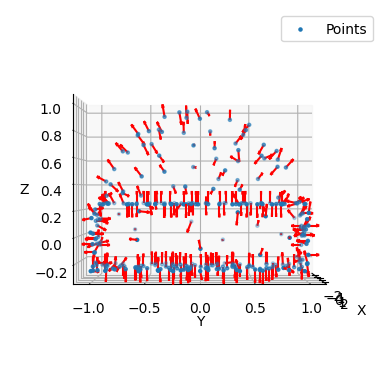

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 점 그리기
ax.scatter(points[:, 0], points[:, 1], points[:, 2], marker='o', s=5, label="Points")

# 법선 벡터 시각화
for i, normal_vector in enumerate(normal_vectors):
    ax.quiver(points[i, 0], points[i, 1], points[i, 2],
              normal_vector[0], normal_vector[1], normal_vector[2], color='red', length=0.1)

# # 탄젠트 벡터 시각화
# for i, tangent_vector in enumerate(tangent_vectors):
#     ax.quiver(points[i, 0], points[i, 1], points[i, 2],
#               tangent_vector[0], tangent_vector[1], tangent_vector[2], color='green', length=0.1)
    
# ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=model.faces, color='white', alpha= 0.3, edgecolor='gray')

# 제목 설정 및 축 라벨
ax.set_xlabel('X')
ax.set_ylabel('Y')  
ax.set_zlabel('Z')
ax.legend()
ax.view_init(elev=0, azim= 0)

# 플롯
plt.show()